In [1]:
import multiprocessing
import MC
import time
import numpy as np
import ast

with open('zeta_dic.txt', 'r') as file:
    # Initialize an empty dictionary
    p = {}
    
    # Iterate through each line in the file
    for line in file:
        # Split each line into key and value based on the delimiter (in this case, ':')
        key, value = line.strip().split(':')
        
        # Assign key-value pair to the dictionary
        p[int(key)] = [int(item) for item in ast.literal_eval(value)]

n = len(p.keys())
# Open the text file for reading
with open('part_dic_13.txt', 'r') as file:
    # Initialize an empty dictionary
    
    # Iterate through each line in the file
    for line in file:
        # Split each line into key and value based on the delimiter (in this case, ':')
        key, value = line.strip().split(':')
        
        # Assign key-value pair to the dictionary
        p[int(key) + n] = [int(item) for item in ast.literal_eval(value)]

n = len(p.keys())
# Open the text file for reading
with open('part_dic_14.txt', 'r') as file:
    # Initialize an empty dictionary
    
    # Iterate through each line in the file
    for line in file:
        # Split each line into key and value based on the delimiter (in this case, ':')
        key, value = line.strip().split(':')
        
        # Assign key-value pair to the dictionary
        p[int(key) + n] = [int(item) for item in ast.literal_eval(value)]


In [9]:
## I wrote a separate file for Decay function is this part, as somehow it doesn't recognize 
## the function in this notebook (seems to be a feature of mp 4 python, from Google)

if __name__ == "__main__":
    log_numbers = np.linspace(4*np.log(10), np.log(len(p.keys())), 45)
    numbers = [int(np.exp(r)) for r in log_numbers]
    # Create a Manager to manage shared objects
    manager = multiprocessing.Manager()

    # Create a shared list to store results
    result_list = manager.list()

    # Create a list to hold the process objects
    processes = []
    tm = []

    for n in numbers:
        musq = 3.5
        tmp = MC.take_first_n_terms(p, n)
        x_initial = np.random.randint(0, len(tmp.keys()))
        # Create a new process, target is the function to run, args is a tuple of arguments for the function
        process = multiprocessing.Process(target=MC.metropolis_hastings_zeta, args = (x_initial, 1e7, tmp, musq, result_list, tm))

        # Append the process to the list
        processes.append(process)
        
        # Record start time
        start_time = time.time()
        
        # Start the process
        process.start()

    # Wait for all processes to finish
    for process in processes:
        process.join()
    
    exc_time = time.time() - start_time
    
    print("All processes are done.")

    results = list(result_list)



KeyboardInterrupt: 

ValueError: x and y must be the same size

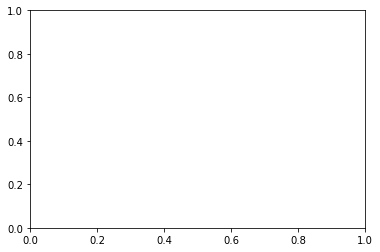

In [8]:
import matplotlib.pyplot as plt

plt.scatter (log_numbers, result_list)
plt.xlabel('State space size')
plt.ylabel (r"absolute error of $\langle \gamma \rangle$")
plt.title (r"error of $\langle \gamma \rangle$ v.s. state space size")
plt.legend()
plt.savefig('error.pdf')